In [1]:
import datetime as dt
import pandas as pd
import requests
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
def get_proj_ids(coins, project_url_df):
    list_id = []
    for coin in coins:
        list_id.append(project_url_df.loc[project_url_df['symbol']== coin,'project_id'].item())
    return list_id
def get_project_url_df():
    url = "https://api.tokenterminal.com/v2/projects"
    headers = {
    "accept": "application/json",
    "authorization": TOKENTERMINAL_API_KEY
    }
    response = requests.get(url, headers=headers)
    list_of_dicts= eval(response.text.replace('null', 'None'))
    return pd.DataFrame(list_of_dicts['data'])
def get_specific_urls(coins, project_url_df):
    spec_urls = project_url_df.loc[project_url_df['symbol'].isin(coins), 'url'].tolist()
    return spec_urls
def get_df_of_OCA(coins, date, project_url_df):
    list_dd = []
    headers = {
        "accept": "application/json",
        "authorization": TOKENTERMINAL_API_KEY
        }
    for url in get_specific_urls(coins, project_url_df):
        response = requests.get(f'https://api.tokenterminal.com{url}/metrics', headers=headers)
        data = response.text.replace("null", "None")
        raw_data_string = data[response.text.find("['")+9:response.text.find("']")]
        try: raw_data = eval(raw_data_string)
        except: continue
        list_dd.append(pd.DataFrame(raw_data))
    FON = list_dd[0]
    count = 0
    for list in list_dd:
        if count == 0: 
            count = count +1
            continue
        else:
            FON= pd.merge(left = FON, right= list_dd[count], how = 'outer', suffixes = (None, coins[count]))
            count = count + 1
            continue
    # FON.drop(['project_name'], axis=1, inplace = True)
    FON['timestamp']=FON['timestamp'].apply(pd.to_datetime)
    FON= FON[(FON['timestamp'] >= date)]
    # npartitions = FON['project_name'].nunique()
    return FON.set_index('project_name')


In [ ]:
import requests

url = "https://api.tokenterminal.com/v2/metric-aggregations?project_ids=aave%2Cmakerdao%2Csynthetix%2Cuniswap%2Clido-finance%2Cchainlink&metric_ids=all"

headers = {
    "accept": "application/json",
    "authorization": TOKENTERMINAL_API_KEY
}

response = requests.get(url, headers=headers)

{"data":[{"project_name":"Aave","project_id":"aave","metric_id":"active_developers","metric_aggregation_name":"active_developers_7d_avg","value":9.857142857142858},{"project_name":"Aave","project_id":"aave","metric_id":"active_developers","metric_aggregation_name":"active_developers_24h_avg","value":9},{"project_name":"Aave","project_id":"aave","metric_id":"active_developers","metric_aggregation_name":"active_developers_30d_avg","value":12.366666666666664},{"project_name":"Aave","project_id":"aave","metric_id":"active_developers","metric_aggregation_name":"active_developers_90d_avg","value":16.14444444444444},{"project_name":"Aave","project_id":"aave","metric_id":"active_developers","metric_aggregation_name":"active_developers_max_ath","value":33},{"project_name":"Aave","project_id":"aave","metric_id":"active_developers","metric_aggregation_name":"active_developers_180d_avg","value":16.538888888888884},{"project_name":"Aave","project_id":"aave","metric_id":"active_developers","metric_a

In [16]:
response.text

'{"message":"invalid params","meta":{"metric_id":["must be lowercase alphanumeric with undescores"]}}'

In [18]:
data= pd.DataFrame.from_dict(eval(response.text.replace('null', 'None'))['data'])


In [22]:
data.columns

Index(['project_name', 'project_id', 'metric_id', 'metric_aggregation_name',
       'value'],
      dtype='object')

In [33]:
processed.loc['aave'].transpose()

project_id,aave,aave,aave,aave,aave,aave,aave,aave,aave,aave,...,aave,aave,aave,aave,aave,aave,aave,aave,aave,aave
metric_aggregation_name,active_developers_7d_avg,active_developers_24h_avg,active_developers_30d_avg,active_developers_90d_avg,active_developers_max_ath,active_developers_180d_avg,active_developers_365d_avg,active_developers_7d_trend,active_developers_30d_trend,active_developers_7d_change,...,user_wau_7d_change,user_wau_90d_trend,user_wau_180d_trend,user_wau_24h_change,user_wau_30d_change,user_wau_365d_trend,user_wau_90d_change,user_wau_max_latest,user_wau_180d_change,user_wau_365d_change
value,9.857143,9.0,12.366667,16.144444,33.0,16.538889,17.821918,-0.188235,-0.281008,-0.25,...,0.161298,0.71998,1.114332,0.008247,-0.051283,0.182336,-0.019211,33133.0,1.475013,1.95936


In [31]:
processed = data.drop(['project_name','metric_id'], axis=1).set_index('project_id')

In [ ]:
url = "https://api.tokenterminal.com/v2/metrics/ps_fully_diluted?project_ids=all"

headers = {
    "accept": "application/json",
    "authorization": TOKENTERMINAL_API_KEY
}

response = requests.get(url, headers=headers)
data= pd.DataFrame.from_dict(eval(response.text.replace('null', 'None'))['data']['projects'])
AM_df = data[data['project_id'].isin(asset_management_ids)]

TypeError: list indices must be integers or slices, not str

In [ ]:
AM_df

In [27]:
coins = ['COW','SAFE','GNO','ETH']
date = pd.to_datetime("jan 1 2021").tz_localize('UTC')
project_url_df = get_project_url_df()  
project_ids = get_proj_ids(coins, project_url_df)
FON = get_df_of_OCA(coins, date, project_url_df)

In [28]:
FON.index.unique()

Index(['CoW Protocol', 'Ethereum', 'Gnosis', 'Safe'], dtype='object', name='project_name')

In [29]:
FON.columns

Index(['timestamp', 'project_id', 'gross_profit', 'cost_of_revenue', 'afpu',
       'arpu', 'fees', 'price', 'revenue', 'earnings', 'expenses', 'treasury',
       'user_dau', 'user_mau', 'user_wau', 'trade_count', 'code_commits',
       'tokenholders', 'treasury_net', 'pf_circulating', 'ps_circulating',
       'trading_volume', 'fees_supply_side', 'pf_fully_diluted',
       'ps_fully_diluted', 'token_incentives', 'active_developers',
       'token_supply_maximum', 'token_trading_volume',
       'market_cap_circulating', 'market_cap_fully_diluted',
       'token_supply_circulating', 'token_turnover_circulating',
       'trading_volume_avg_per_user', 'token_turnover_fully_diluted',
       'trading_volume_avg_per_trade_count', 'block_time', 'transaction_count',
       'contract_deployers', 'contracts_deployed', 'transaction_fee_average',
       'transactions_per_second'],
      dtype='object')

In [30]:
COW= FON.loc['CoW Protocol'].dropna(how='all').dropna(axis=1, how='all').set_index('timestamp')
SAFE =FON.loc['Safe'].dropna(how='all').dropna(axis=1, how='all').set_index('timestamp')
GNO = FON.loc['Gnosis'].dropna(how='all').dropna(axis=1, how='all').set_index('timestamp')
ETH = FON.loc['Ethereum'].dropna(how='all').dropna(axis=1, how='all').set_index('timestamp')

In [40]:
dfs = [COW, SAFE, GNO, ETH]
for df in dfs:
    df['price_MA(50)'] = df['price'].rolling(window=50).mean()
    df['Annualised_volatility(7d)'] = df['price'].rolling(window=7).std() * np.sqrt(365)
    df['Log_return'] = np.log(df['price']/df['price'].shift(1))
    df['Average_code_commit(7d)'] = df['code_commits'].rolling(window=7).mean()

In [32]:
COW['project_id'].unique().item()

'cow-protocol'

In [33]:
dates=[]
for date in ['2022-1-6', '2022-1-9', '2022-1-28', '2022-2-4', '2022-2-9', '2022-2-16', '2022-4-8', '2022-4-15']: 
    dates.append(pd.to_datetime(date).tz_localize('UTC'))

In [34]:
dfs_cow = [COW, ETH, GNO]
dates_cow = dates[0:4]
dfs_safe = [SAFE, ETH, GNO]
dates_safe = dates[4:]

In [ ]:
dfs_valuation = []

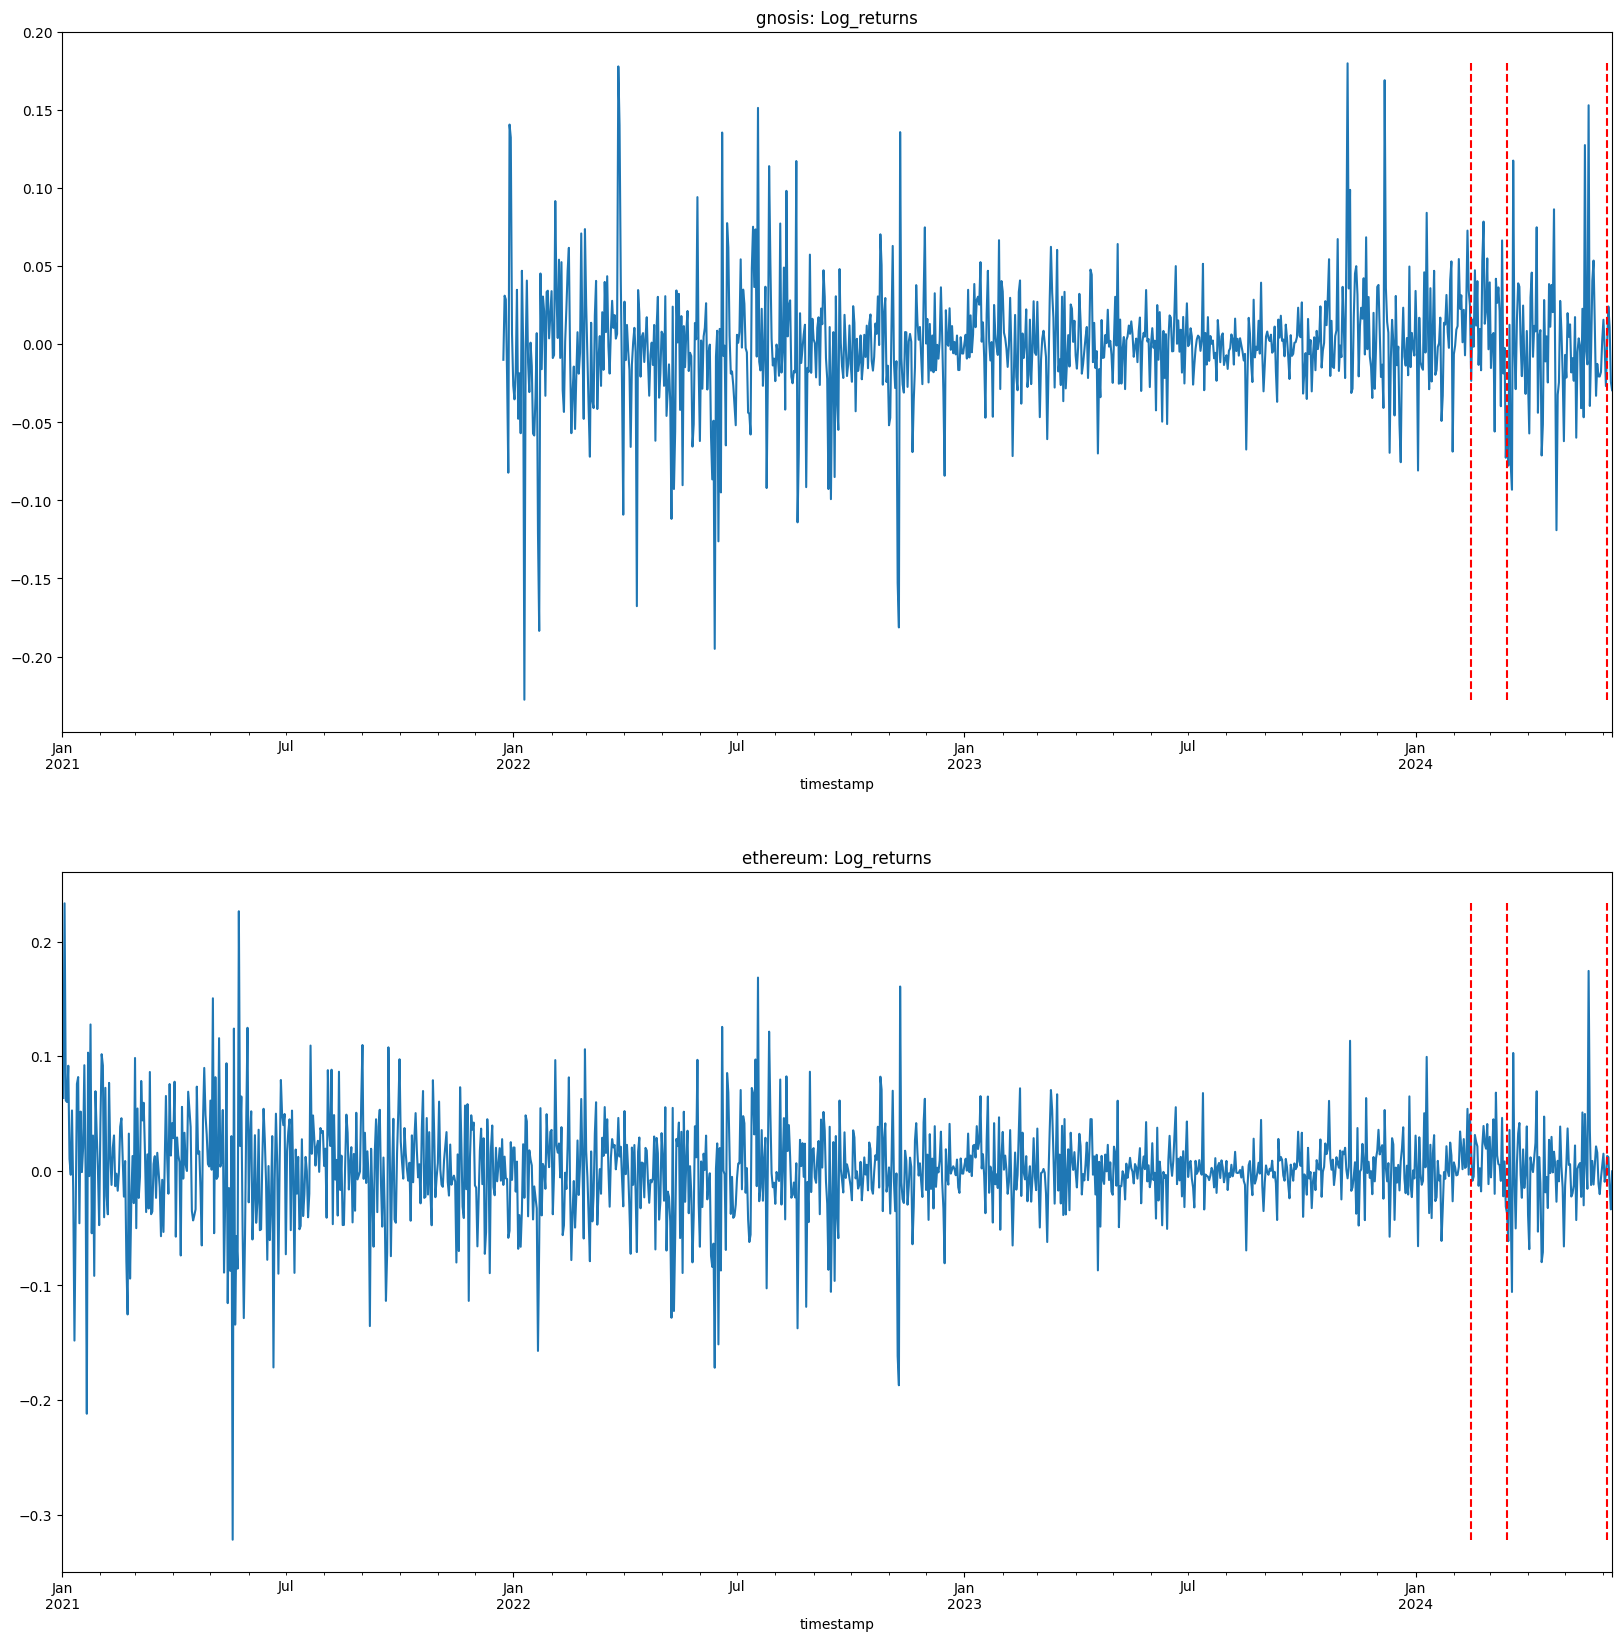

In [35]:
dfs_kapart = [GNO, ETH]
dates_kapart = ['2024-2-15', '2024-3-15', '2024-6-4']
fig, axes = plt.subplots(nrows=len(dfs_kapart), figsize=(20, 20), sharex=False)
count = 0
for df in dfs_kapart:
    name = df['project_id'].unique().item()
    df['Log_return'].plot(ax=axes[count], title=f'{name}: Log_returns', fillstyle = 'full').vlines(x=dates_kapart, ymin=df['Log_return'].min(), ymax=df['Log_return'].max(), color='r', linestyle='--')
    count = count +1


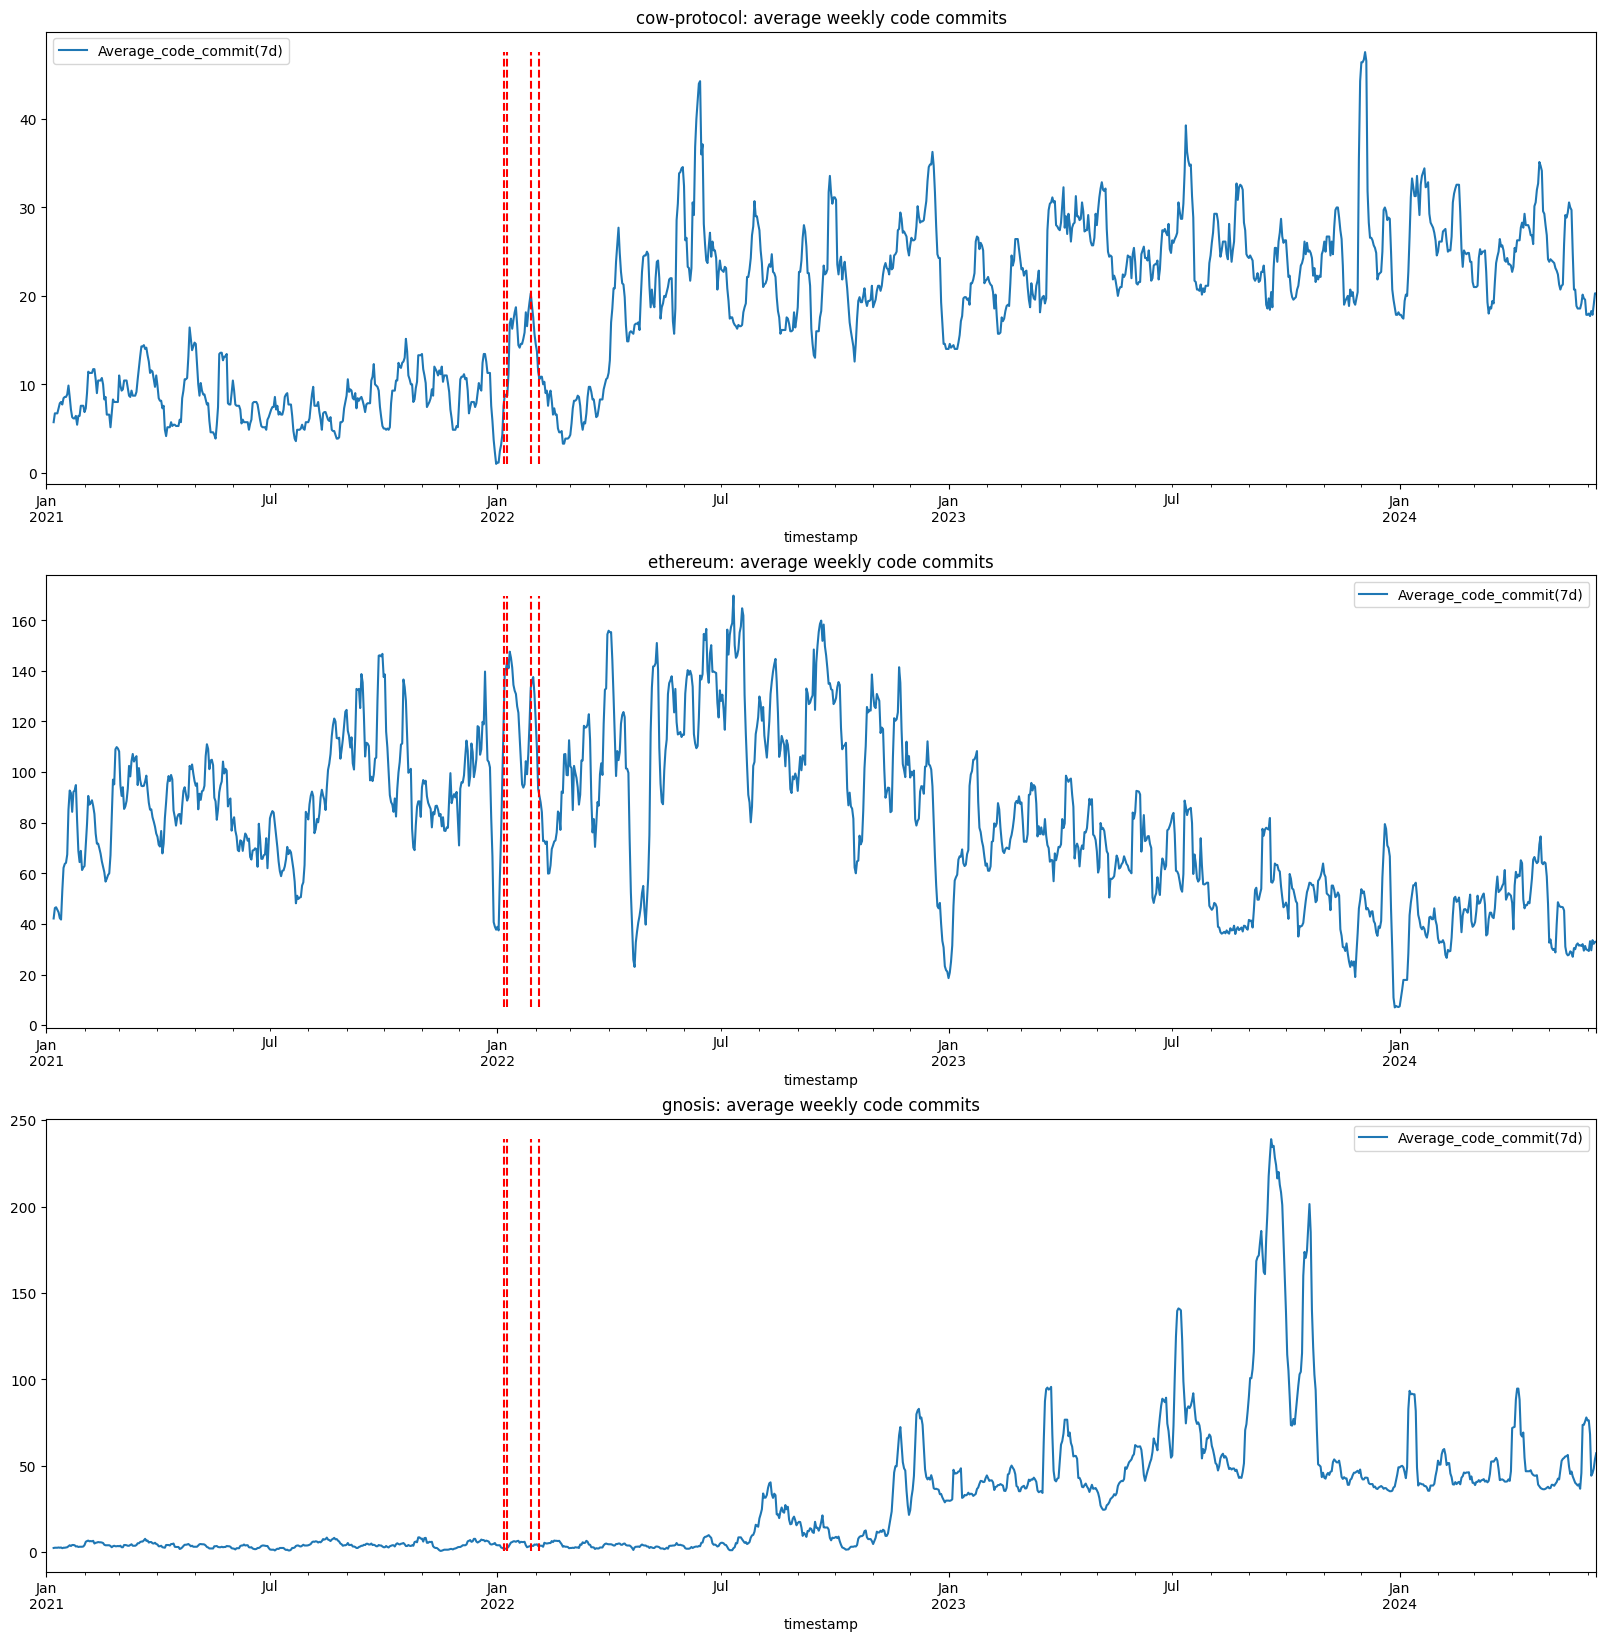

In [42]:
# price
fig, axes = plt.subplots(nrows=len(dfs_cow), figsize=(20, 20), sharex=False)
count = 0

for df in dfs_cow:
    name = df['project_id'].unique().item()
    df[['Average_code_commit(7d)']].plot(ax=axes[count], title=f'{name}: average weekly code commits', fillstyle = 'full').vlines(x=dates_cow, ymin=df['Average_code_commit(7d)'].min(), ymax=df['Average_code_commit(7d)'].max(), color='r', linestyle='--')
    count = count +1
# plt.vlines(x=dates, ymin=0, ymax=1, color='r', linestyle='--')

In [37]:
SAFE.columns

Index(['project_id', 'price', 'code_commits', 'tokenholders',
       'active_developers', 'token_supply_maximum', 'market_cap_fully_diluted',
       'price_MA(50)', 'Annualised_volatility(7d)', 'Log_return'],
      dtype='object')

<Axes: xlabel='timestamp'>

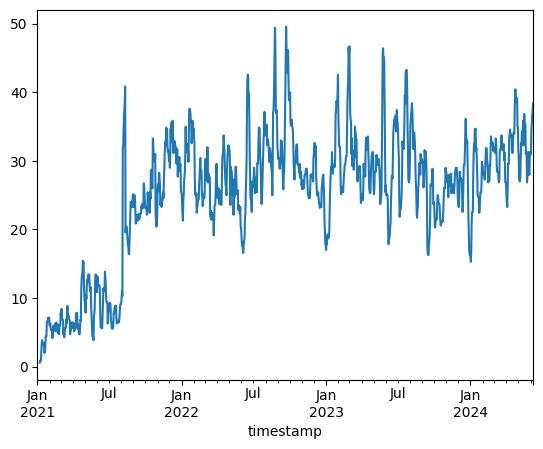

In [39]:
SAFE['code_commits'].rolling(7).mean().plot()

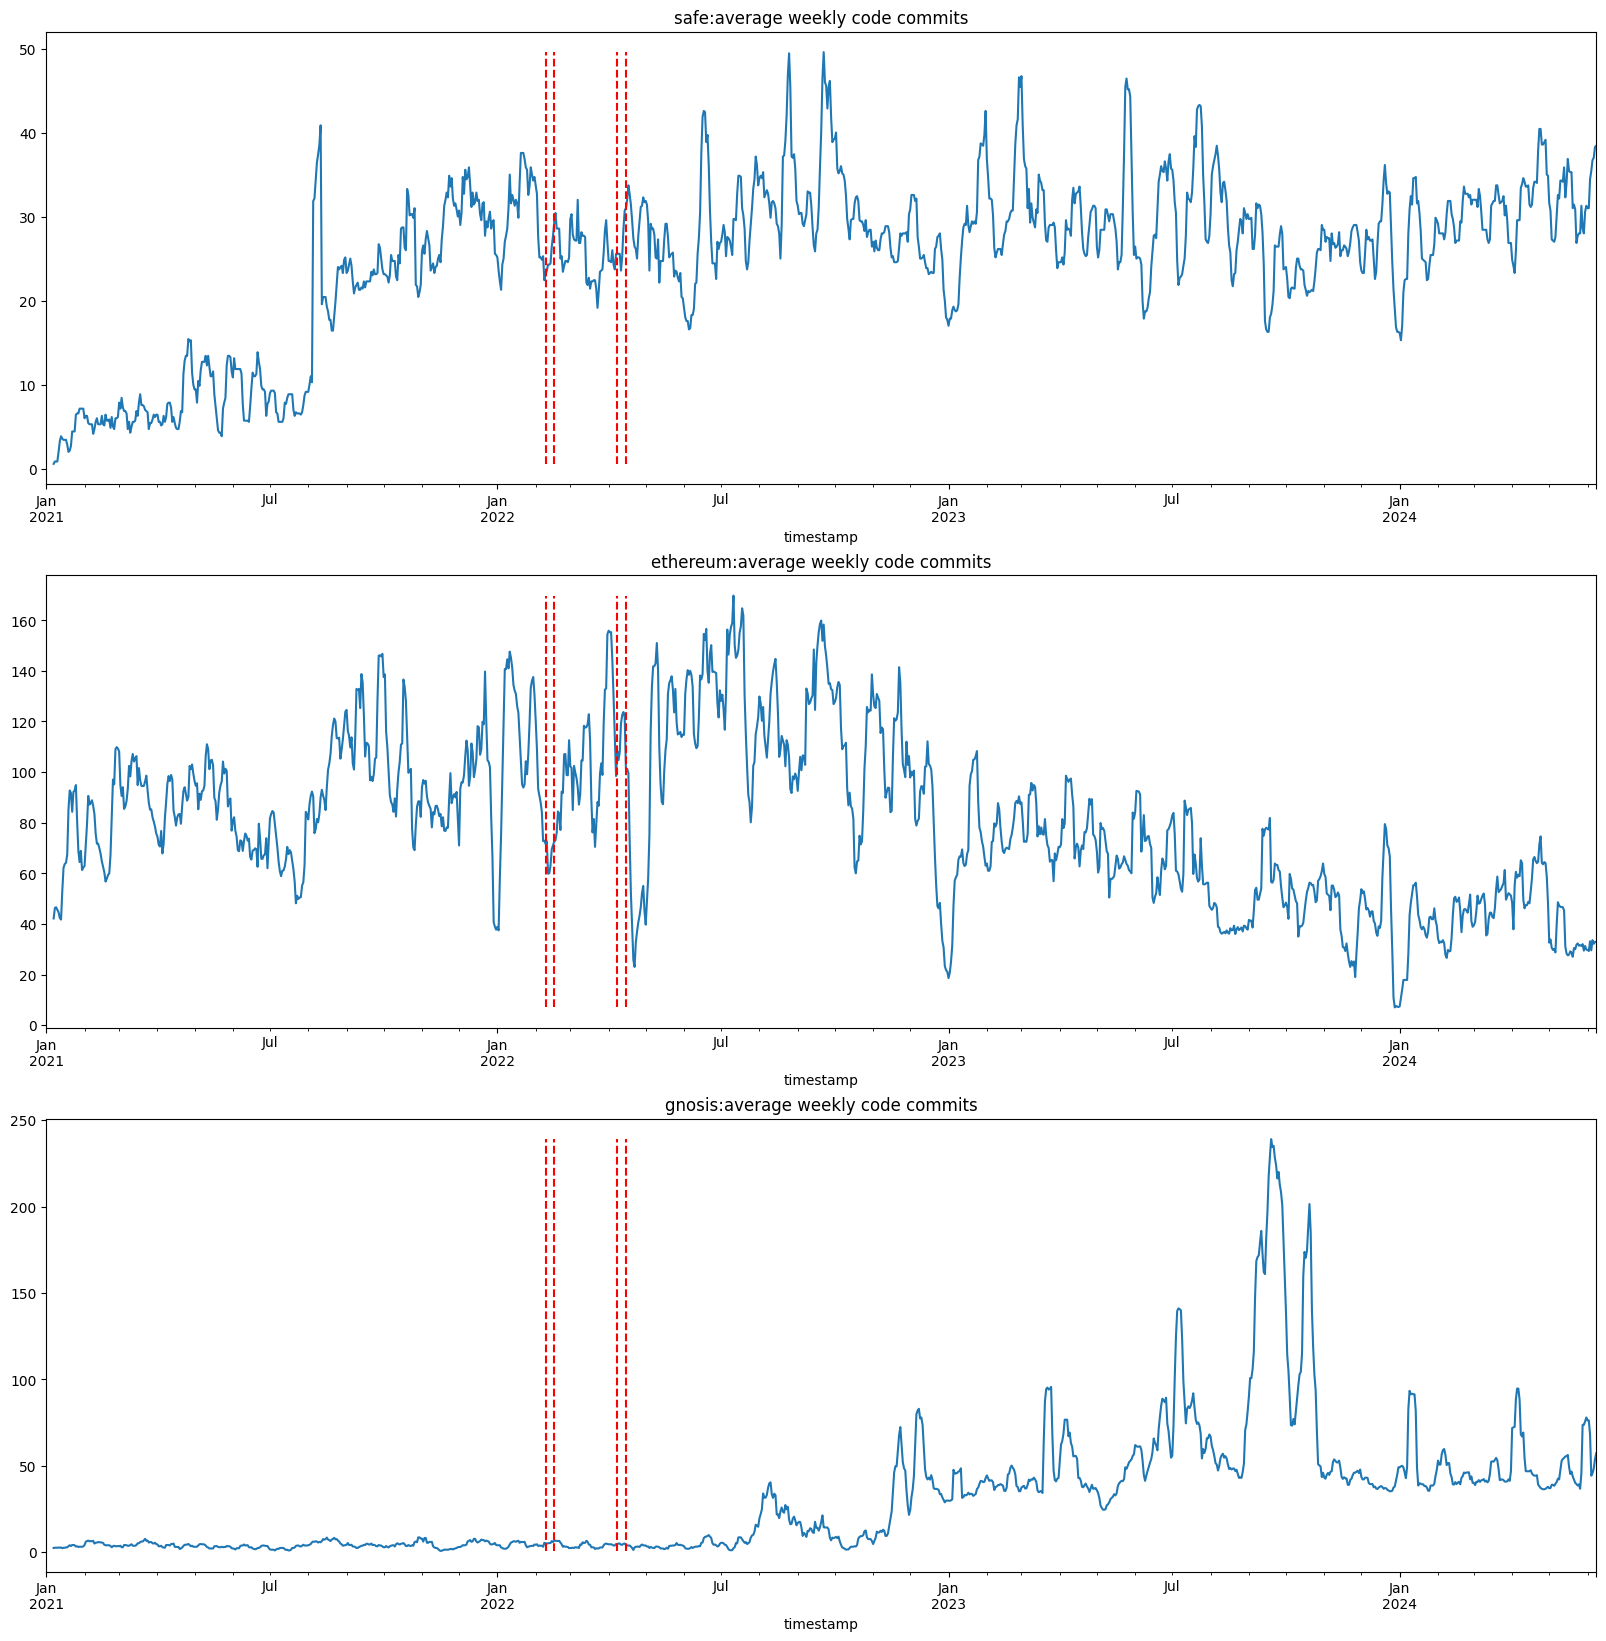

In [43]:
# price
fig, axes = plt.subplots(nrows=len(dfs_safe), figsize=(20, 20), sharex=False)
count = 0
for df in dfs_safe:
    name = df['project_id'].unique().item()
    df['Average_code_commit(7d)'].plot(ax=axes[count], title=f'{name}:average weekly code commits', fillstyle = 'full').vlines(x=dates_safe, ymin=df['Average_code_commit(7d)'].min(), ymax=df['Average_code_commit(7d)'].max(), color='r', linestyle='--')
    count = count +1
# plt.vlines(x=dates, ymin=0, ymax=1, color='r', linestyle='--')

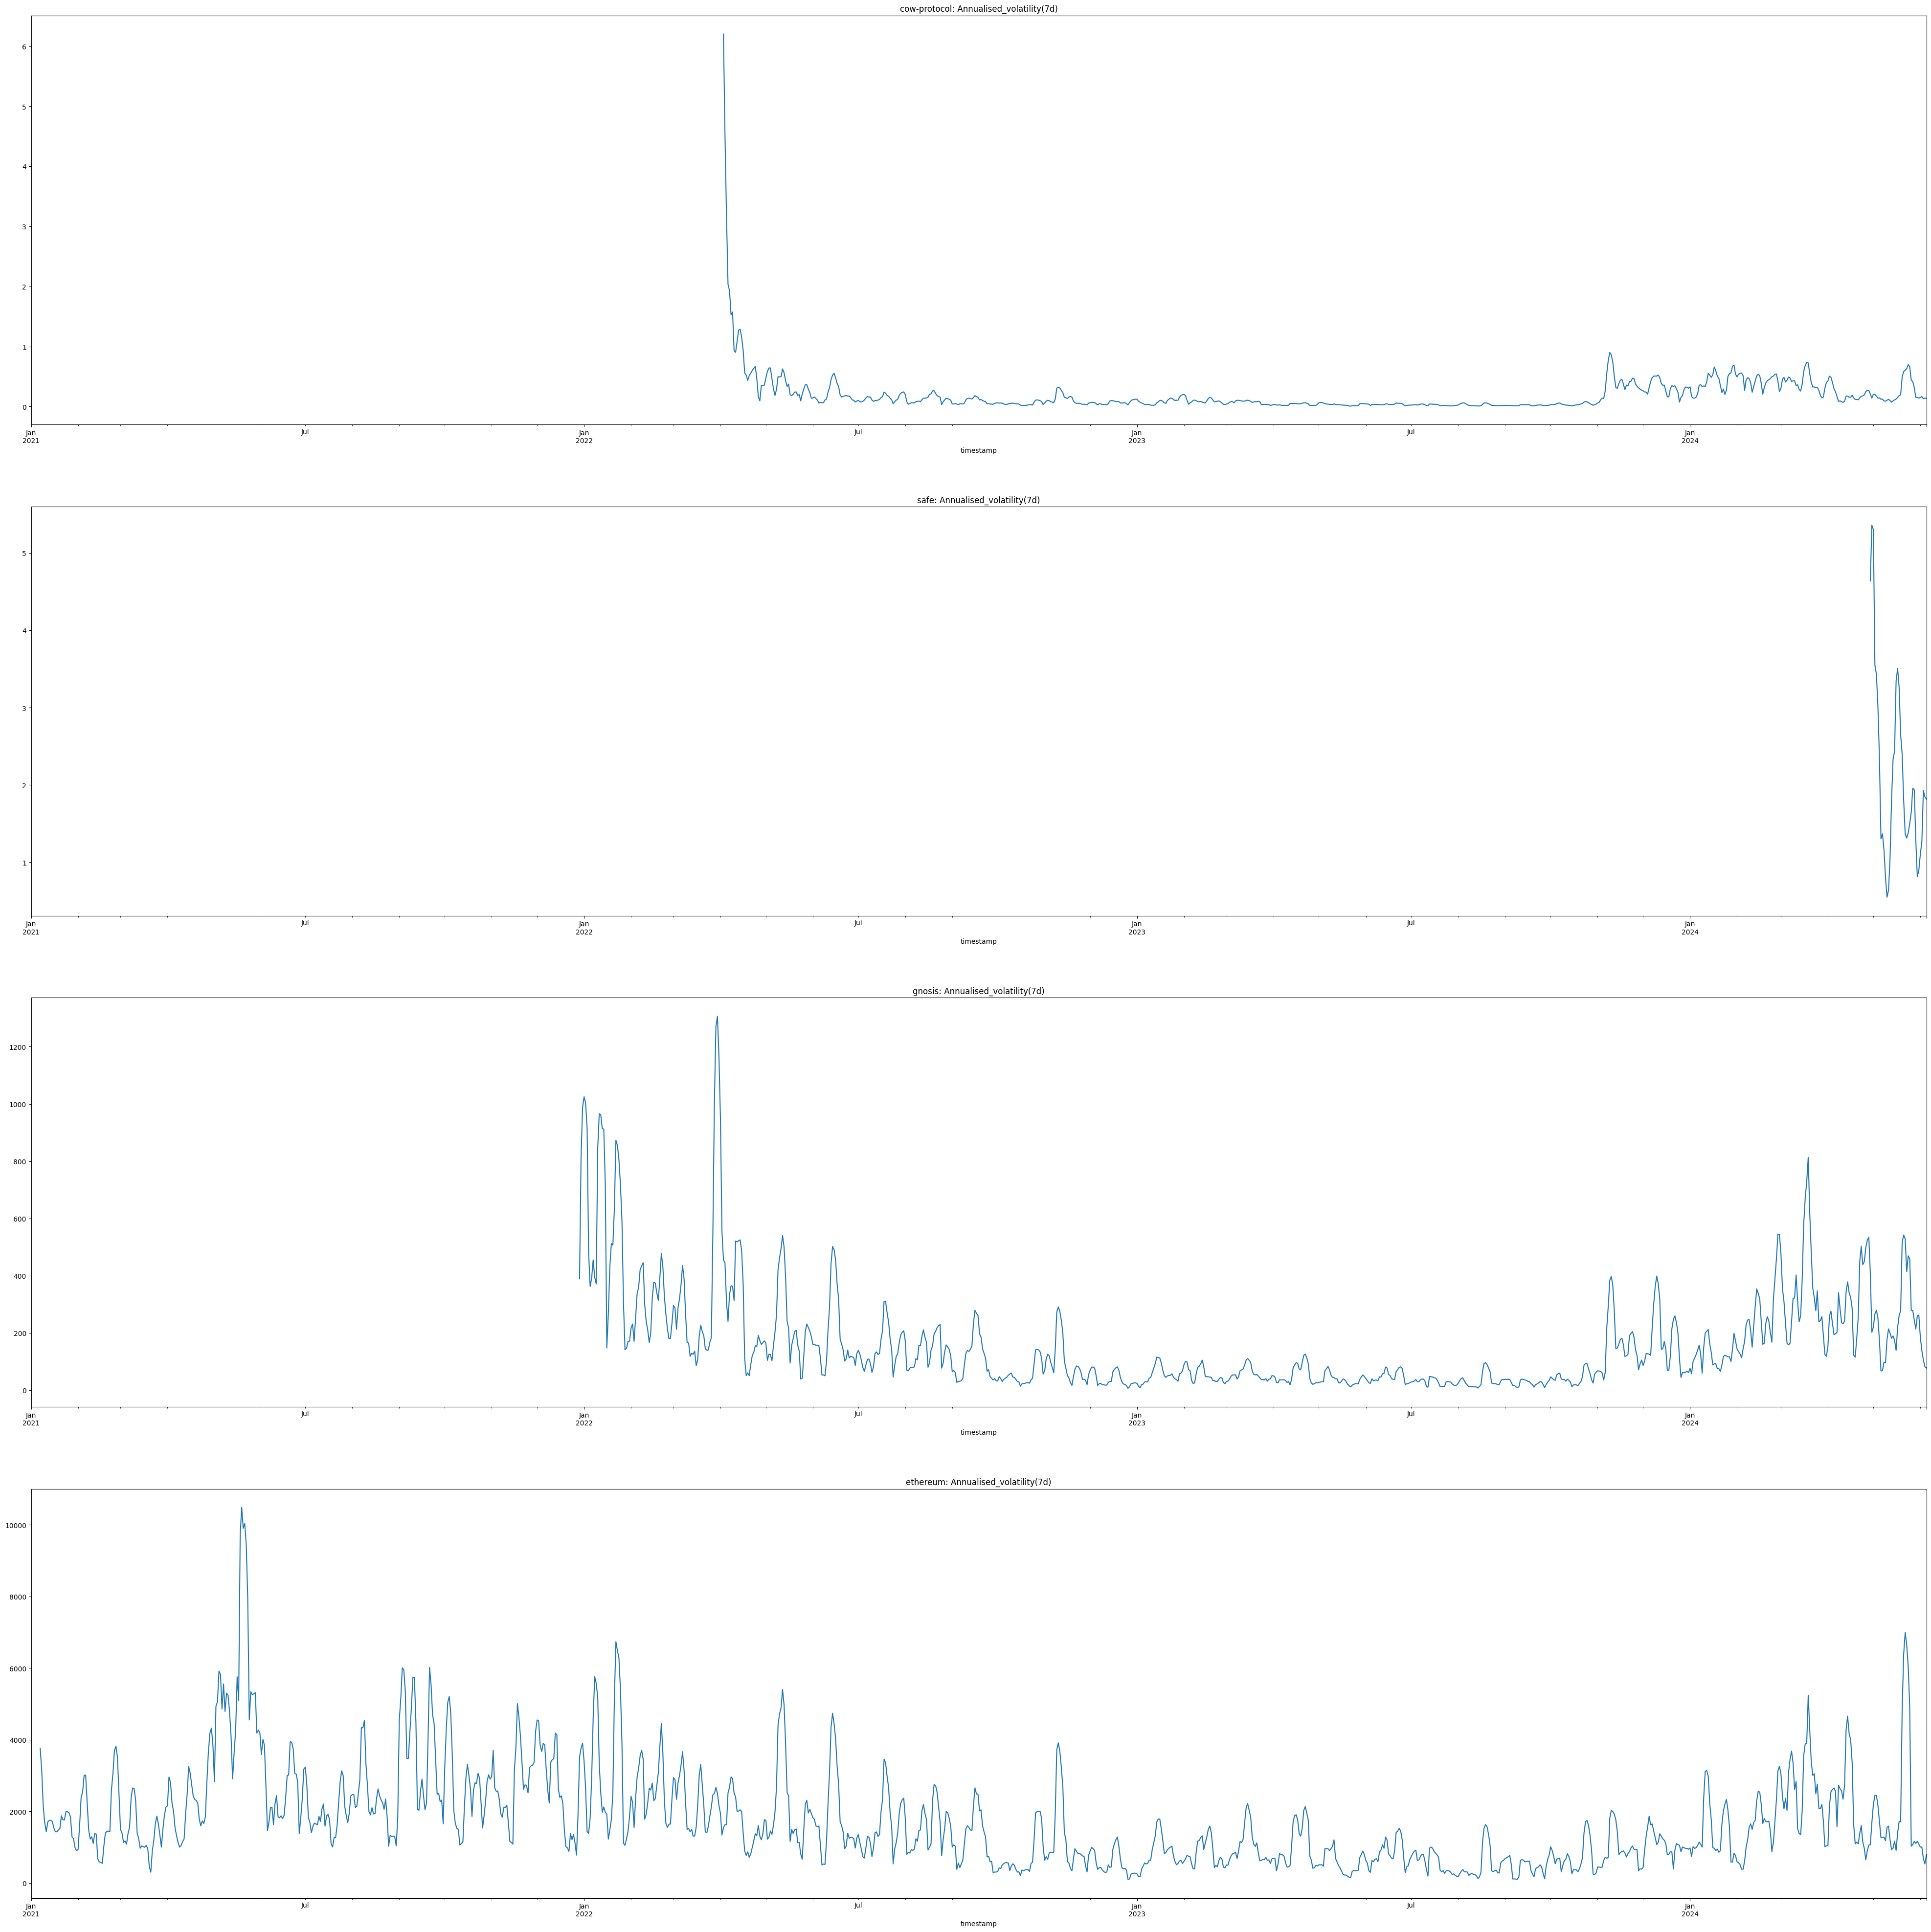

In [104]:
# Volatility
fig, axes = plt.subplots(nrows=len(dfs), figsize=(50, 50))
count = 0
for df in dfs:
    name = df['project_id'].unique().item()
    df['Annualised_volatility(7d)'].plot(ax=axes[count], title=f'{name}: Annualised_volatility(7d)')
    count = count +1

<Axes: xlabel='timestamp'>

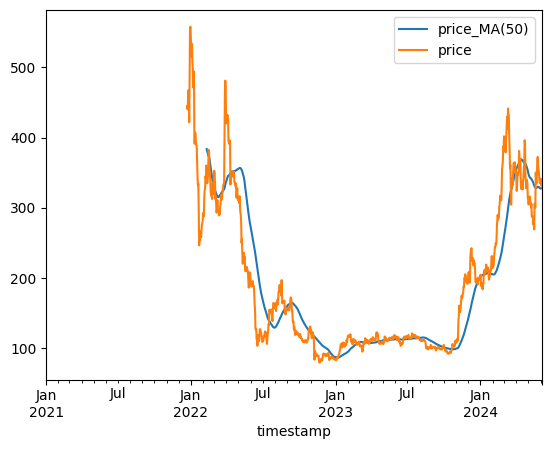

In [37]:
GNO[['price_MA(50)','price']].plot()

In [26]:
FON[['price', 'revenue', 'earnings', 'expenses', 'treasury', 'user_dau', 'ps_fully_diluted', 'ps_circulating', 'price_MA(50)']].plot(subplots=True, layout=(3,3), figsize=(20, 20), title = 'Metrics for COW, SAFE, GNO, ETH')

KeyError: "['price_MA(50)'] not in index"